In [1]:
import tweepy
import json 
import csv
import codecs
from os import remove
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from lmfit.models import StepModel, LinearModel

### Autenticación de usuario para la app de twitter

In [2]:
consumer_key = 'FsNkq2SyJl469EAnCJlzQjTbW'
consumer_secret = 'LdBzdUNzoM9dcz4Oa2BOCp8Lp6IqdvRk3khvxYRdwnWQdxnDPl'
access_token ='1339939296611069957-g6C97ncUsHoBAj5y8mH6XOegM90jv5' 
access_token_secret = 'J9hkEtJaNC1Doxe2PhE6ymT2l83x77zFUjRAkwrW0jiWk'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

auth.set_access_token(access_token,access_token_secret)
#OBTENER MI INFORMACION
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 

### Creación de un array con los candidatos a precidencia de la república del Ecuador
#### Estos son los nombres que usan los candidatos en la red social Twitter 


In [3]:
candidatos = ['LassoGuillermo','AbAlvaroNoboa', 'ecuarauz' , 'yakuperezg','juanfervelasco','xhervas','PaulCarrascoC'  ]
#candidatos_Asamblea = ['karlabeltrang','ceciline1','LourdesCuestaO', 'AndreGonzalezBe']
candidatos

['LassoGuillermo',
 'AbAlvaroNoboa',
 'ecuarauz',
 'yakuperezg',
 'juanfervelasco',
 'xhervas',
 'PaulCarrascoC']

### Obtenemos la información relevantes para la regresión de la cuenta del candidato

In [30]:
remove("candidatos.csv")


name, user, location, follower, fecha, id_tweet, text, menciones, likes, hashtags, share = '','', '' ,'','','','','','','',''
rows  = [['Nombre', 'usuario', 'locacion', 'followers Twitter', 'fecha tweet',
          'id tweet', 'contenido','menciones' , 'hashtags','likes',  'veces compartido']]
contador_filas =0
for candidato in candidatos:
    data = api.get_user(candidato)
    print('DATOS DEL CANDIDATO: '+ data._json['name'])
    print('usuario  => ' +data._json['screen_name'])
    print('Ubicación => '+data._json['location'])
    print('Seguidores en Twitter => '+ str(data._json['followers_count']))
    #print(type(data._json['entities']))
    #print(type(data._json['status']))
    diccionario =data._json['entities'] 
    lista=[]
   
    for link in diccionario :  #recorremos 
        valor = diccionario[link]
        for vrd_valor in valor:
            lista = [lista,valor[vrd_valor]]
            
    new_lista = lista[0]
    listaA=new_lista[1]
    i=0;
    link_candidato=''
    for dia in listaA:
        link =dia
        for links in link:
            i=i+1
            if i == 2:
                link_candidato =link[links]
                
            #print(link[links])

    print(link_candidato)
    print('TWEETS DEL CANDIDATO')
    name, user, location, followers = data._json['name'],data._json['screen_name'],data._json['location'],data._json['followers_count']
    print(followers)
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=candidato, tweet_mode = 'extend').items(25):
        #print(json.dumps(tweet._json, indent=2))
        #print('DESCRICPCIÓN TWEET:' )
        #print('PUBLICADO EL   => ' +str(tweet._json['created_at']))
        #print('ID tweet  => ' +str(tweet._json['id_str']))
        #print('TEXTO  => ' +str(tweet._json['text']))
        #print('RETWITEADO  => ' +str(tweet._json['retweet_count']) + ' veces')
        #print("LIKE's => " +str(tweet._json['favorite_count']) )
        #print('Lugar  => ' +str(tweet._json['entities']))
        #print(tweet._json['entities'])
        diccionario =tweet._json['entities'] 
        hashtags = diccionario['hashtags']
        menciones = diccionario['user_mentions']
        i=0;
        j=0;
        #print('HASHTAGS:')
        users_mnc=''
        hastags=''
        for dia in hashtags:
            hst = dia
            for links in hst:

                i=i+1
                if i == 1:
                    hastags =hst[links]
                    #print(hastags)

        #print('USERS MECIONADOS:')
        for m in menciones:
            mnc = m
           #print(mnc)
            for m_user in mnc:
                j=j+1
                if j == 1:
                    users_mnc=mnc[m_user]
                    #print(mnc[m_user])
        fecha, id_tweet, text, menciones, likes,share=tweet._json['created_at'],tweet._json['id_str'],tweet._json['text'].encode("utf-8"),users_mnc,tweet._json['favorite_count'],tweet._json['retweet_count']       
        single_row=[name, user, location, followers, fecha, id_tweet, text, menciones,hastags, likes, share]
        rows.append(single_row)
        #print(text)

#for datos in row_data:
    #print(datos)

with open('candidatos.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

DATOS DEL CANDIDATO: Guillermo Lasso
usuario  => LassoGuillermo
Ubicación => 
Seguidores en Twitter => 624171
http://www.guillermolasso.ec
TWEETS DEL CANDIDATO
624171
DATOS DEL CANDIDATO: Alvaro Noboa
usuario  => AbAlvaroNoboa
Ubicación => Guayaquil, Ecuador
Seguidores en Twitter => 18632
http://www.alvaronoboa.com/
TWEETS DEL CANDIDATO
18632
DATOS DEL CANDIDATO: Andrés Arauz
usuario  => ecuarauz
Ubicación => Ecuador
Seguidores en Twitter => 55843
http://facebook.com/ecuarauz2021
TWEETS DEL CANDIDATO
55843
DATOS DEL CANDIDATO: Yaku Pérez Guartambel
usuario  => yakuperezg
Ubicación => Cuenca de Guapondelig
Seguidores en Twitter => 57105
http://www.yakuperez.com
TWEETS DEL CANDIDATO
57105
DATOS DEL CANDIDATO: Juan Fernando Velasco
usuario  => juanfervelasco
Ubicación => Ecuador
Seguidores en Twitter => 913196
http://www.juanfernandovelasco.com
TWEETS DEL CANDIDATO
913196
DATOS DEL CANDIDATO: Xavier Hervas
usuario  => xhervas
Ubicación => Quito, Ecuador
Seguidores en Twitter => 5147
http:

## Una vez echo la recolección de datos, vamos a empezar con las regresiones matemáticas.


In [4]:
#cargamos los datos de entrada
data = pd.read_csv("candidatos.csv", engine='python')
#veamos cuantas dimensiones y registros contiene
data.shape
data

,Nombre,usuario,locacion,followers Twitter,fecha tweet,id tweet,contenido,menciones,hashtags,likes,veces compartido
0,Guillermo Lasso,LassoGuillermo,NaN,624171,Sat Dec 19 23:40:58 +0000 2020,1340442029730500609,b'\xc2\xa1GRACIAS LOJA!\n\nLa alegr\xc3\xada p...,NaN,NaN,381,108
1,Guillermo Lasso,LassoGuillermo,NaN,624171,Sat Dec 19 21:25:05 +0000 2020,1340407830625579008,"b'Con @guido_chiriboga , tenemos la #Capacidad...",guido_chiriboga,CapacidadParaCambiar,222,91
2,Guillermo Lasso,LassoGuillermo,NaN,624171,Sat Dec 19 19:15:25 +0000 2020,1340375198768480256,b'\xc2\xbfCu\xc3\xa1les son nuestras propuesta...,NaN,NaN,349,115
3,Guillermo Lasso,LassoGuillermo,NaN,624171,Sat Dec 19 19:12:49 +0000 2020,1340374548303241217,b'Hoy estuvimos en rueda de prensa con los can...,CREOEcuador,NaN,291,103
4,Guillermo Lasso,LassoGuillermo,NaN,624171,Sat Dec 19 16:43:55 +0000 2020,1340337076412305408,b'\xc2\xa1Loja nos recibe con alegr\xc3\xada y...,NaN,CapacidadParaCambiar,366,114
...,...,...,...,...,...,...,...,...,...,...,...
170,Paul Ernesto Carrasco,PaulCarrascoC,"Quito, Ecuador",142536,Mon Jul 06 17:07:41 +0000 2020,1280186669799403520,b'https://t.co/s30xFCpOnk en Carcel\xc3\xa9n. ...,NaN,NaN,7,3
171,Paul Ernesto Carrasco,PaulCarrascoC,"Quito, Ecuador",142536,Mon Jul 06 16:19:25 +0000 2020,1280174522986045440,b'https://t.co/NaVMoBaF1t',NaN,NaN,8,2
172,Paul Ernesto Carrasco,PaulCarrascoC,"Quito, Ecuador",142536,Mon Jul 06 16:14:46 +0000 2020,1280173353312100353,"b'En vivo desde La Casa de la Justicia, en Car...",NaN,NaN,38,8
173,Paul Ernesto Carrasco,PaulCarrascoC,"Quito, Ecuador",142536,Sat Jul 04 13:25:04 +0000 2020,1279405872943431682,b'Hoy a las 17h00. A trav\xc3\xa9s de la se\xc...,NaN,NaN,15,2


In [187]:
data = data[data['usuario'].isin(['ecuarauz'])] #Filtro la Informacion solo para un candidato
data = data.loc[:,['fecha tweet','followers Twitter','contenido','likes', 'veces compartido']] 
FMT = '%a %b %d %H:%M:%S +0000 %Y'
date = data['fecha tweet']
data['fecha tweet'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("Sat Jul 04 13:25:04 +0000 2020", FMT)).days)
print(data)
y = data['veces compartido']
print('hola')

    fecha tweet  followers Twitter  \
50          168              55843   
51          168              55843   
52          168              55843   
53          168              55843   
54          168              55843   
55          168              55843   
56          168              55843   
57          168              55843   
58          168              55843   
59          168              55843   
60          168              55843   
61          168              55843   
62          168              55843   
63          167              55843   
64          167              55843   
65          167              55843   
66          166              55843   
67          166              55843   
68          166              55843   
69          165              55843   
70          165              55843   
71          164              55843   
72          164              55843   
73          163              55843   
74          163              55843   

           

In [5]:
data.describe()

,followers Twitter,id tweet,likes,veces compartido
count,175.000000,1.750000e+02,175.000000,175.000000
mean,259518.571429,1.332244e+18,333.954286,138.725714
std,334581.726620,1.607386e+16,872.243229,283.218924
min,5147.000000,1.278066e+18,0.000000,0.000000
25%,18632.000000,1.333793e+18,1.000000,1.000000
50%,57105.000000,1.338341e+18,38.000000,14.000000
75%,624171.000000,1.340061e+18,293.500000,124.000000
max,913196.000000,1.340661e+18,8400.000000,2215.000000


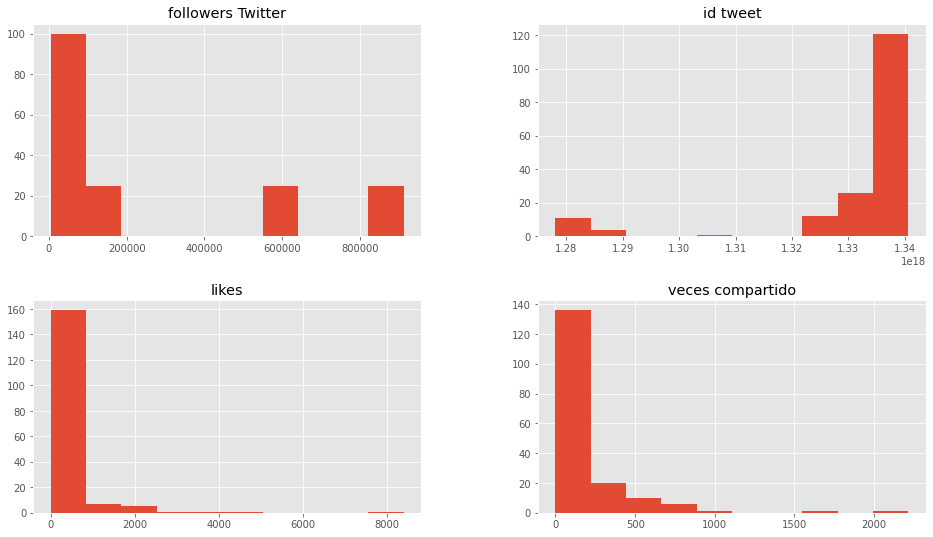

In [6]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['contenido'],1).hist()
plt.show()


<AxesSubplot:xlabel='fecha tweet'>

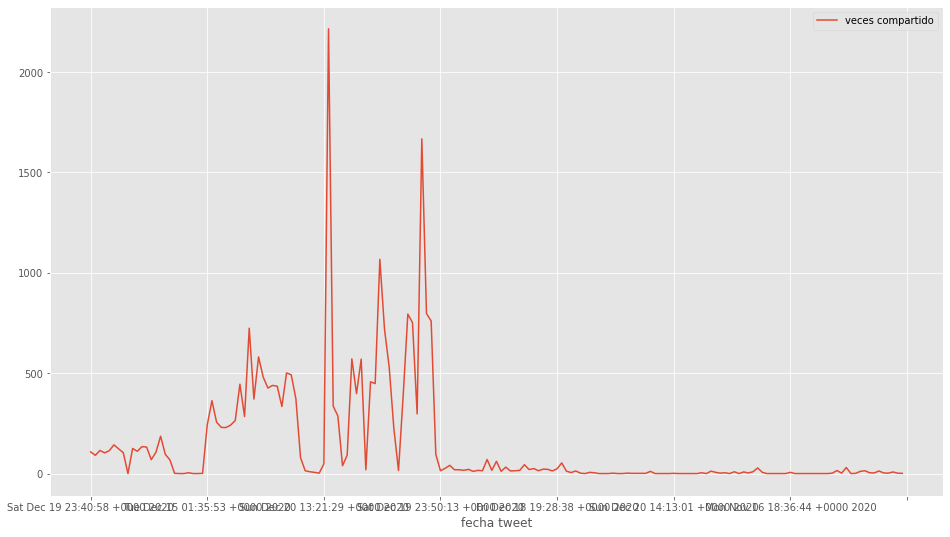

In [7]:
data.plot(x ='fecha tweet', y='veces compartido')

## Para el entrenamiento y toda regresión se tomará en cuenta el número de seguidores y número de veces que se han compartido los tweets
### Se filtra según el número de seguidores 

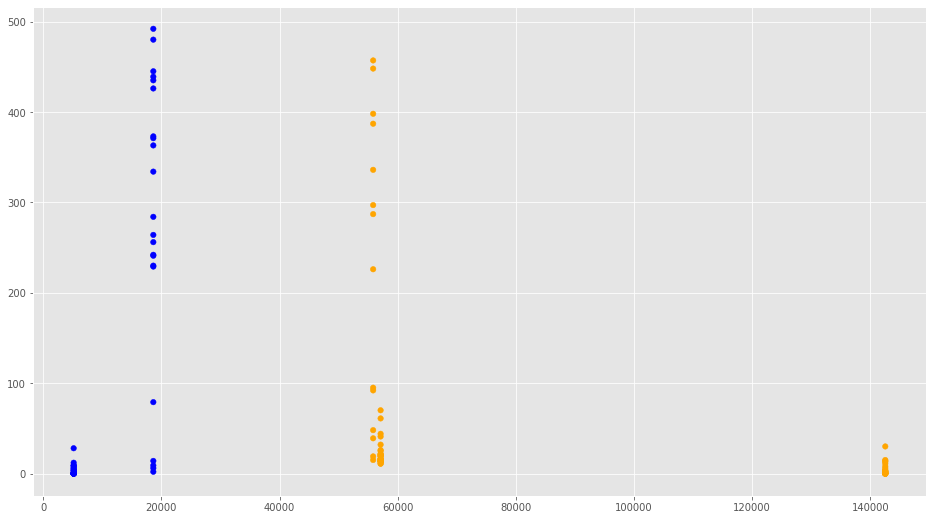

In [8]:

filtered_data = data[(data['followers Twitter'] <= 150000) & (data['veces compartido'] <= 500)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['followers Twitter'].values
f2 = filtered_data['veces compartido'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['followers Twitter']>55000):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [10]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["followers Twitter"]]
X_train = np.array(dataX)
y_train = filtered_data['veces compartido']
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.00080587]
Independent term: 
 135.51531854844404
Mean squared error: 19987.50
Variance score: 0.08


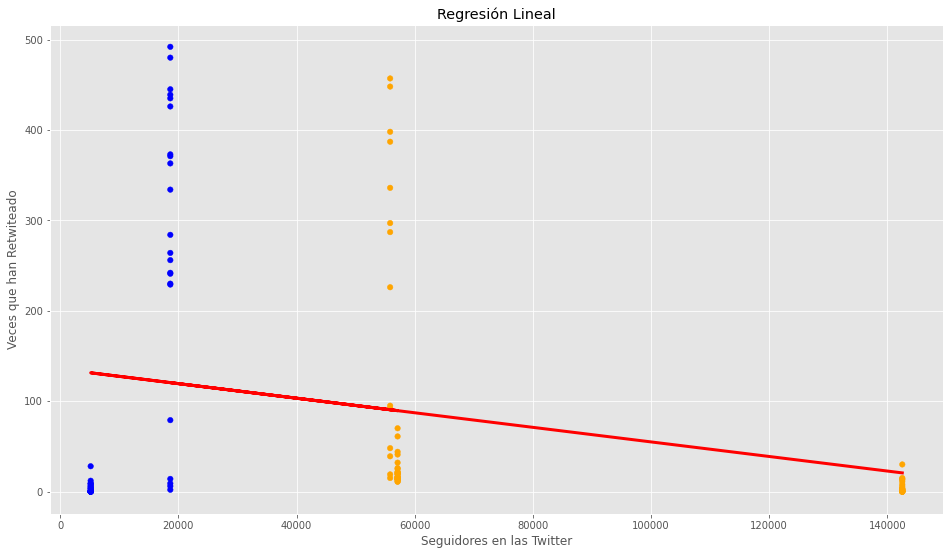

In [11]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Seguidores en las Twitter')
plt.ylabel('Veces que han Retwiteado')
plt.title('Regresión Lineal')

plt.show()

## Predicción de cuantas veces será compartido un tweet según el número de seguidores y las retwiteadas enteriores

In [12]:
y_Dosmil = regr.predict([[20000]])
print(int(y_Dosmil))

119


In [14]:
x = data['followers Twitter']
y = data['veces compartido']

a = -1.2451526219564013e-19 , b = 2.0770471425197685e-13, c = -9.633614417703054e-08, d = 0.009547343923532741, e = 41.173270239559045


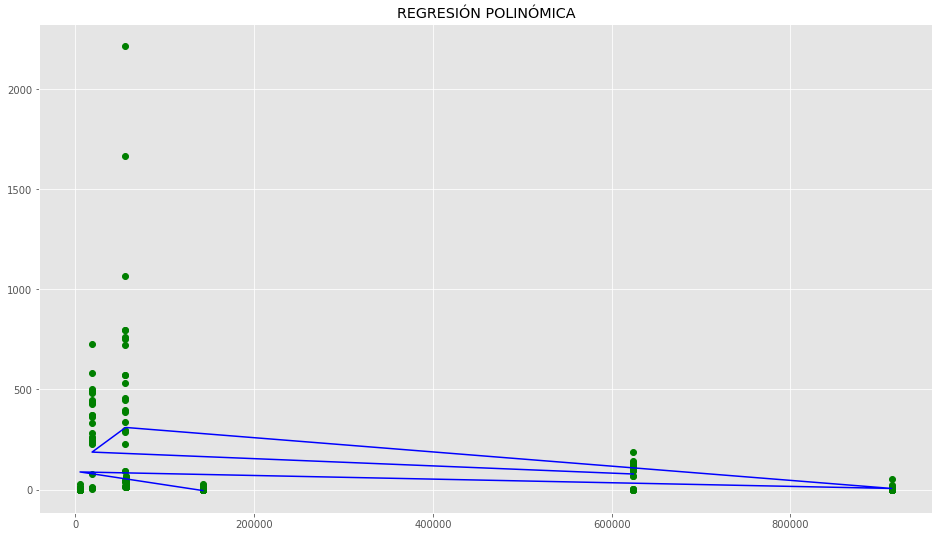

El número de comparticiones aproximadas 310.4542870945851


In [32]:
x2 = np.array(x, dtype=float)
y2 = np.array(y, dtype=float) 

def func_polinomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

popt1, pcov1 = curve_fit(func_polinomial, x2, y2)
print ("a = %s , b = %s, c = %s, d = %s, e = %s" % (popt1[0], popt1[1], popt1[2], popt1[3], popt1[4]))

plt.plot(x2, y2, 'go',label="Datos Originales")
plt.plot(x2, func_polinomial(x2, *popt1), color = 'blue')
plt.title('REGRESIÓN POLINÓMICA')
plt.show()



pro_x1 = func_polinomial(60000,*popt1)
print("El número de comparticiones aproximadas", pro_x1)



<ipython-input-16-03e8e9573b9a>:5: RuntimeWarning: overflow encountered in exp
  return np.round(a * np.exp(b * x))
<ipython-input-16-03e8e9573b9a>:5: RuntimeWarning: invalid value encountered in multiply
  return np.round(a * np.exp(b * x))
D:\Users\leand\anaconda3\envs\ia2\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-16-03e8e9573b9a>:5: RuntimeWarning: overflow encountered in exp
  return np.round(a * np.exp(b * x))
<ipython-input-16-03e8e9573b9a>:5: RuntimeWarning: invalid value encountered in multiply
  return np.round(a * np.exp(b * x))


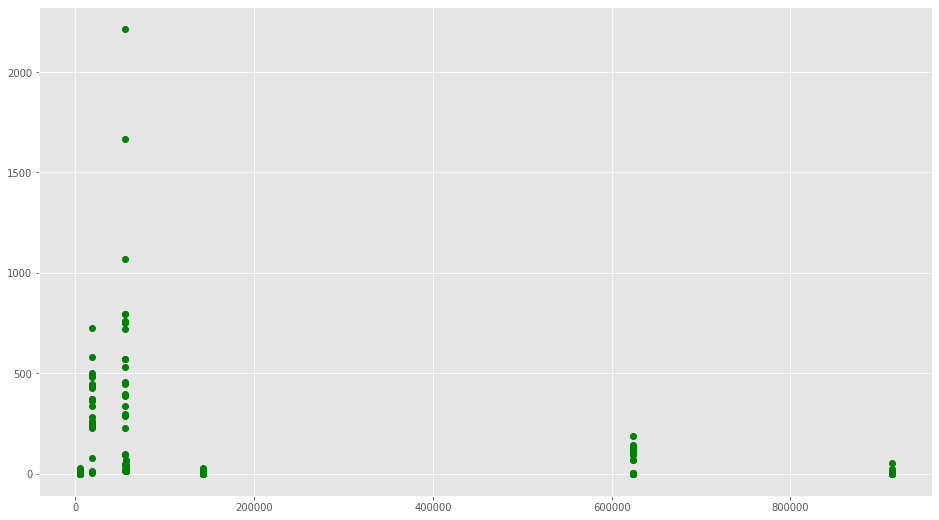

El número de shares de un tweet de un candidato que tenga 60000 segurio=dores será:  nan


<ipython-input-16-03e8e9573b9a>:5: RuntimeWarning: overflow encountered in exp
  return np.round(a * np.exp(b * x))
<ipython-input-16-03e8e9573b9a>:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.round(a * np.exp(b * x))


In [16]:
x1 = np.array(x) #transformo mi array de datos a floats 
y1 = np.array(y)

def mod_exponencial(x, a, b): #funcion que permite realizar la regrecion con el modelo exponencial
    return np.round(a * np.exp(b * x))

popt, pcov = curve_fit(mod_exponencial, x1, y1, p0=(0,0.8))

step_mod = StepModel(form='linear', prefix='step_')
line_mod = LinearModel(prefix='line_')
#Grfica del modelo exponencial

plt.plot(x1, y1, 'go',label="k Original Data")
plt.plot(x1, mod_exponencial(x1,*popt),color='blue')
plt.title('REGRESIÓN EXPONENCIAL')
plt.show()


pro_x = mod_exponencial(60000,*popt)
print("El número de shares de un tweet de un candidato que tenga 60000 segurio=dores será: ", pro_x)


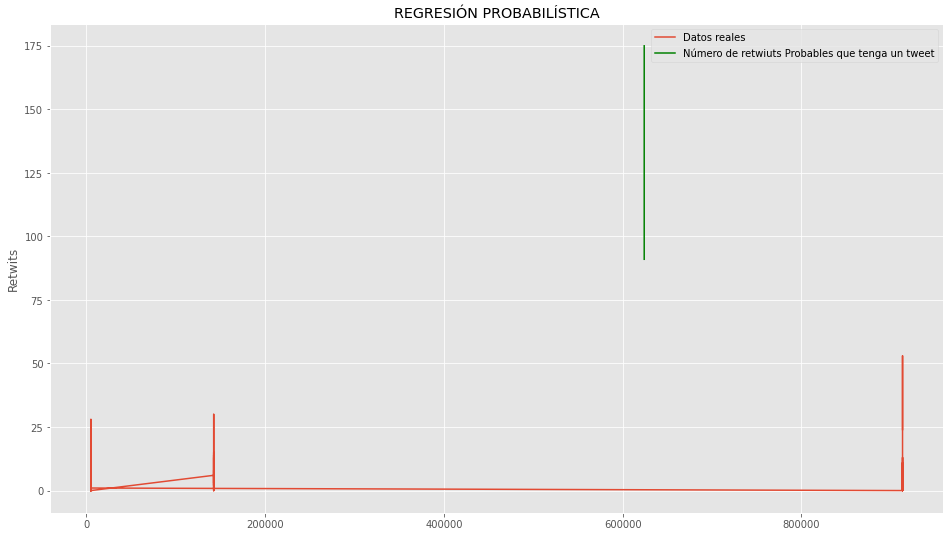

In [33]:
filtro = data["veces compartido"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
x4, y4 = [x[1]], [y[1]]
for i in range(x[0], x[0] + 6):
    x4.append(i)
    y4.append(int(y4[-1] + mediana))
plt.plot(x[100:], y[100:], label="Datos reales")
plt.plot(x4, y4, label="Número de retwiuts Probables que tenga un tweet", color="green")
plt.legend()
plt.ylabel("Retwits")
plt.title('REGRESIÓN PROBABILÍSTICA')
plt.show()